In [1]:
import sys
sys.path.insert(1, '/projects/home/mmasood1/TG GATE/active_learning')

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from utils.data_utils import get_random_query_set, get_query_set, update_training_set, remove_queried_index_from_pool_set

Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_geometric'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (/home/mmasood1/.conda/envs/env_arslan/lib/python3.9/site-packages/deepchem/models/torch_models/__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [17]:
def get_results(model_dir, num_itterations):
    seed_list = [1,2,3]
    results_all = pd.DataFrame()
    for seed in seed_list:
        for itteration in range(num_itterations):
            try:
                result_itteration = pd.read_csv(model_dir + f"/Results/itteration_{itteration}_metrics_itteration_{itteration}_s{seed}_alpha_0.0_gamma_0.0_loss_type_BCE_λ0.01.csv")
                result_itteration = result_itteration[result_itteration.Tasks == "Y"]
                result_itteration.insert(0, "Itteration", itteration)
                result_itteration.insert(0, "seed", seed)
                results_all = pd.concat([results_all, result_itteration], axis = 0)
            except:
                pass
    return results_all

In [23]:
config = {
          "Uniform_BERT_dir":"/projects/home/mmasood1/trained_model_predictions/DILI/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/uniform/Y/",
          "BALD_BERT_dir": "/projects/home/mmasood1/trained_model_predictions/DILI/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/BALD/Y/",
          "EPIG_BERT_dir": "/projects/home/mmasood1/trained_model_predictions/DILI/Frozen_BERT/Main_Aux_tasks_setting/1_main_0_aux/EPIG_MT/Y/"
}

In [45]:
max_itterations = 200
Uniform = get_results(config["Uniform_BERT_dir"], max_itterations)
BALD = get_results(config["BALD_BERT_dir"], max_itterations)
EPIG = get_results(config["EPIG_BERT_dir"], max_itterations)

Uniform["Acq_Func"] = "Uniform"
BALD["Acq_Func"] = "BALD"
EPIG["Acq_Func"] = "EPIG"

result_data = pd.concat([Uniform,BALD,EPIG])
result_data = result_data.groupby(["seed","Acq_Func","Itteration"]).mean().reset_index()

/tmp/ipykernel_73986/3554249829.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result_data = result_data.groupby(["seed","Acq_Func","Itteration"]).mean().reset_index()


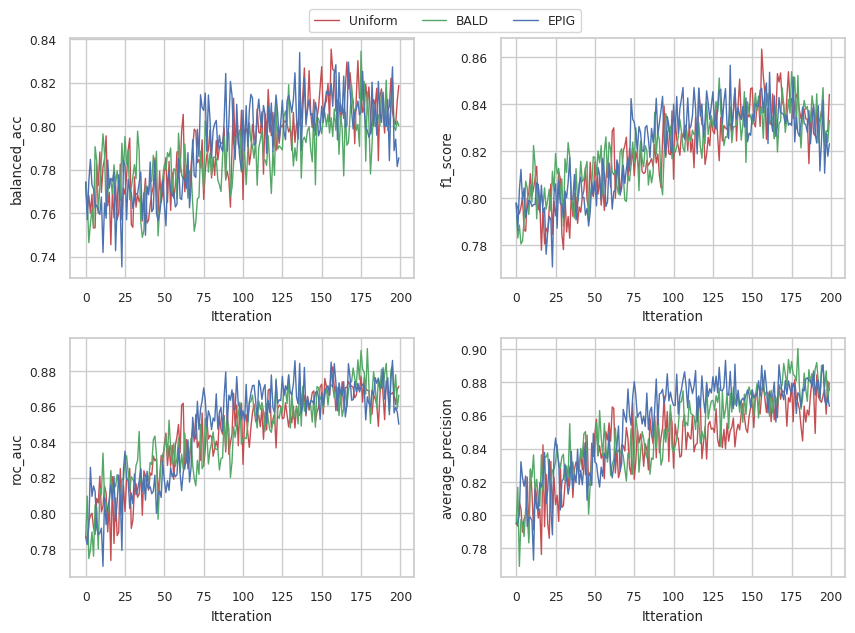

In [38]:
#metrics_list = ["average_precision"]
metrics_list = ["balanced_acc","f1_score","roc_auc", "average_precision"]
sns.set(font_scale=0.8)  # crazy big
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,7),
                    gridspec_kw = {'wspace':0.25, 'hspace':0.25},
                    #sharey = 'col',
                    #sharex = True
                    )

ax = ax.ravel()
for i, metric in enumerate(metrics_list):
    sns.lineplot(data = result_data, x = "Itteration", y = metric, 
                hue = "Acq_Func", ax = ax[i], linestyle = "-", 
                palette=['r', 'g','b'], lw = 1, errorbar = None#"se"
                )

    if i != 0:
        ax[i].get_legend().remove()
    #ax[i].axhline(y = baseline_main[metric].values, ls = '--', color = 'Red')
    #ax[i].set_title(metric)

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.88), ncol=3)
ax[0].get_legend().remove()


#fig.savefig("/home/mmasood1/.TG GATE/active_learning/figures/Vanilla_BERT_vs_ToxBERT_average_precison.png",
#            dpi = 300)

In [52]:
test_set = pd.read_csv("/projects/home/mmasood1/arslan_data_repository/DILI/seed_1/test_seed_1.csv")
test_set

,Drug_ID,Drug,Y
0,443884.0,CC(CO)NC(=O)C1C=C2c3cccc4[nH]cc(c34)CC2N(C)C1,0.0
1,9681.0,CCC(CO)NC(=O)C1C=C2c3cccc4c3c(cn4C)CC2N(C)C1,0.0
2,8226.0,CCC(CO)NC(=O)C1C=C2c3cccc4[nH]cc(c34)CC2N(C)C1,0.0
3,4474.0,COC(=O)C1=C(C)NC(C)=C(C(=O)OCCN(C)Cc2ccccc2)C1...,1.0
4,4976.0,CNCCCC1c2ccccc2C=Cc2ccccc21,0.0
...,...,...,...
91,3724.0,CC(=O)N(CC(O)CN(C(C)=O)c1c(I)c(C(=O)NCC(O)CO)c...,0.0
92,4917.0,CN1CCN(CCCN2c3ccccc3Sc3ccc(Cl)cc32)CC1,1.0
93,5291.0,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,1.0
94,5717.0,COc1cc(C(=O)NS(=O)(=O)c2ccccc2C)ccc1Cc1cn(C)c2...,1.0


In [51]:
50/ 95

0.5263157894736842